# Project: Investigate a Dataset "No Show Appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset I've selected for analysis. At the end of this section, describe the questions that I plan on exploring over the course of the report.

**Data No Show Appointment**
<br>
Link of data : https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
<br>

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<br>


> **PatientId** : Identity of patient
<br>
> **AppointmentID** : Identity of appointment 
<br>
> **Gender** : Indicates gener of patient
<br>
> **ScheduledDay** : Tells us on what day the patient set up their appointment.
<br>
> **AppointmentDay** : Tells us on what day the patient have to at their appointment.
<br>
> **Age** : Indicates ages of patient
<br>
> **Neighbourhood** : Indicates the location of the hospital.
<br>
> **Scholarship** : Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<br>
> **Hipertension** :Indicate whether or not the patient has hypertension
<br>
> **Diabetes** : Indicate whether or not the patient is diabetic
<br>
> **Alcoholism** : Indicate whether or not the patient is an alcoholic
<br>
> **Handcap** : Indicate whether or not the patient is handicap
<br>
> **SMS_received** : Indicate whether or not the patient received SMS
<br>
> **No-show** : It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

<br>


This data is answer question below :
<br>

> **How does No show rate by Gender, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received ?**

In [102]:
# Use this cell to set up import statements for all of the packages that I
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [103]:
# Load data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [104]:
# view dimensions of dataset
df.shape

(110527, 14)

In [105]:
# types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [106]:
# view missing value count for each feature
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [107]:
# print number of duplicates in datasets
df.duplicated().sum()

0

> **This data have no row is null and have no row is douplicate**



### Data Cleaning

In [108]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#convert dada in datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#df.rename(columns = {'No-show ':'No_show '}, inplace = True)
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

#print result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


> **In this section of report, I changed name and types of columns.**

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned your data, I're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

### Research Question 1 : No show rate by gender

In [109]:
# function to exploire chart by proportion
def prodPlot(df, grapvar, xy=['F','M'], labs=['Without','With']):
    df_gender = df.groupby([grapvar,'no_show']).count().patientid
    rate_f_no_show = df_gender[xy[0]]['Yes']/(df_gender[xy[0]]['No'] + df_gender[xy[0]]['Yes'])
    rate_m_no_show = df_gender[xy[1]]['Yes']/(df_gender[xy[1]]['No'] + df_gender[xy[1]]['Yes'])
    locations = [1, 2]
    heights = [rate_f_no_show, rate_m_no_show]
    labels = [f'{labs[0]} {grapvar}', f'{labs[1]} {grapvar}']
    plt.bar(locations, heights, tick_label=labels)
    plt.title(f'No show rate by {grapvar}'.title(), weight = 'bold')
    plt.xlabel(grapvar)
    plt.ylabel('Proportion of no show')
    

In [110]:
# function to exploire chart by sum
def sumcompareplot(df, grapvar, xy=['F','M'],labs= ['Female', 'Male'] ):
    df_gender = df.groupby([grapvar,'no_show']).count().patientid
    show = [df_gender[xy[0]]['No'], df_gender[xy[1]]['No']]
    no_show = [df_gender[xy[0]]['Yes'], df_gender[xy[1]]['Yes']]
    index =  [f'{labs[0]} {grapvar}', f'{labs[1]} {grapvar}']
    df_g_plt = pd.DataFrame({'show': show,
                       'no_show': no_show}, index=index)
    ax = df_g_plt.plot.bar(rot=0)
    # Add title and format it - replace 'Title'
    plt.title(f'Distribution of No-show by {grapvar}',
                   fontsize = 14, weight = "bold")
    # Add x label and format it - replace 'X_label'
    plt.xlabel(grapvar,
                   fontsize = 10, weight = "bold")
    # Add y label and format it - replace 'Y_label'
    plt.ylabel(f'Sum of {grapvar}',
                   fontsize = 10, weight = "bold")

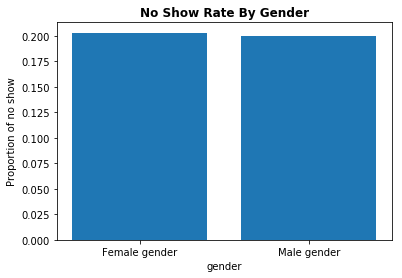

In [111]:
# no show by gender
prodPlot(df,'gender', xy=['F','M'], labs=['Female','Male'] )

> **This chart indicates female and male have no show rate are equal**

Text(0.5,1,'Percentage Breakdown: Gender')

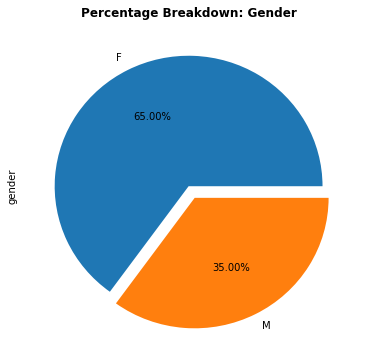

In [112]:
# percentage breakdown: gender
df['gender'].value_counts().plot(kind='pie',figsize=(6,6),explode=[0,0.1], autopct='%1.2f%%');
plt.title('percentage breakdown: gender'.title(), weight = 'bold')

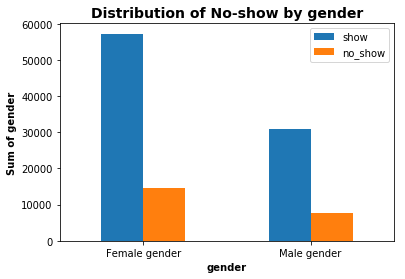

In [113]:
# Explore py chart
sumcompareplot(df, 'gender',xy=['F','M'],labs= ['Female', 'Male']  )

> **This chart indicates female have a lot of appointment than male**

### Research Question 2 : No show rate by scholarship

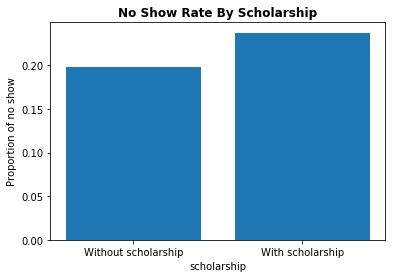

In [114]:
# no show by scholarship
prodPlot(df,'scholarship', xy=[0,1],  labs=['Without','With'] )

> **This chart indicates No scholarship has no show rate less than scholarship**

Text(0.5,1,'Percentage Breakdown: Scholarship')

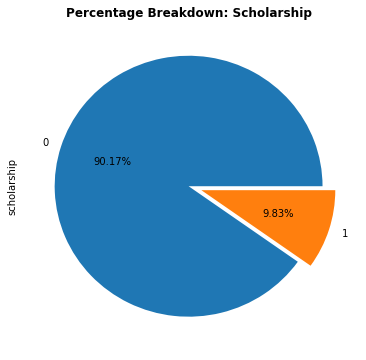

In [115]:
# percentage breakdown: scholarship
df['scholarship'].value_counts().plot(kind='pie',figsize=(6,6),explode=[0,0.1], autopct='%1.2f%%');
plt.title('percentage breakdown: scholarship'.title(), weight = 'bold')

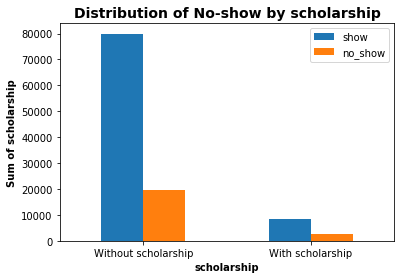

In [116]:
# Explore py chart
sumcompareplot(df, 'scholarship',xy=[0,1],labs= ['Without','With'])

> **This chart indicates No scholarship have a lot of appointment than scholarship**

### Research Question 3 : No show rate by hipertension

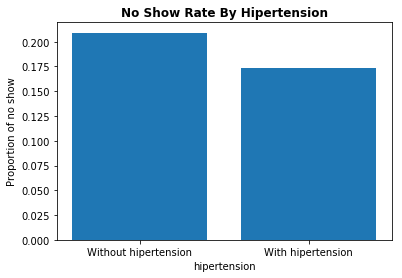

In [117]:
# no show by hipertension
prodPlot(df,'hipertension', xy=[0,1],  labs=['Without','With'] )

> **This chart indicates No hipertension has no show rate more than hipertension**

Text(0.5,1,'Percentage Breakdown: Hipertension')

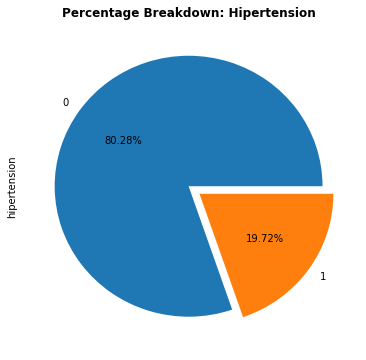

In [118]:
# percentage breakdown: hipertension
df['hipertension'].value_counts().plot(kind='pie',figsize=(6,6),explode=[0,0.1], autopct='%1.2f%%');
plt.title('percentage breakdown: hipertension'.title(), weight = 'bold')

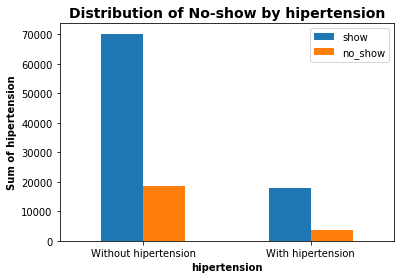

In [119]:
# Explore py hipertension
sumcompareplot(df, 'hipertension',xy=[0,1],labs= ['Without','With'])

> **This chart indicates No hipertension has a lot of appointment than hipertension**

### Research Question 4 : No show rate by diabetes

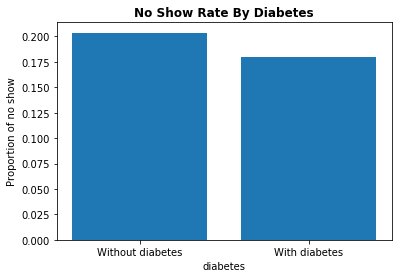

In [120]:
# no show by diabetes
prodPlot(df,'diabetes', xy=[0,1],  labs=['Without','With'] )

> **This chart indicates no diabetes has no show rate more than diabetes**

Text(0.5,1,'Percentage Breakdown: Diabetes')

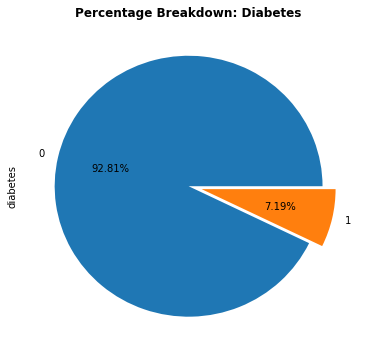

In [121]:
# percentage breakdown: diabetes
df['diabetes'].value_counts().plot(kind='pie',figsize=(6,6),explode=[0,0.1], autopct='%1.2f%%');
plt.title('percentage breakdown: diabetes'.title(), weight = 'bold')

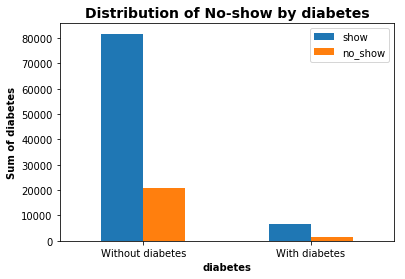

In [122]:
# Explore py chart
sumcompareplot(df, 'diabetes',xy=[0,1],labs= ['Without','With'])

> **This chart indicates no diabetes has a lot of appointment than diabetes**

### Research Question 5 : No show rate by alcoholism

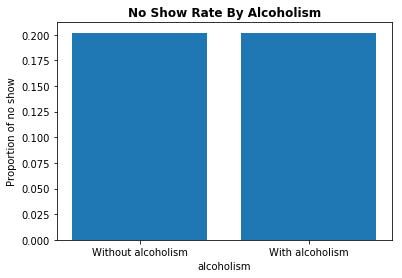

In [123]:
# no show by alcoholism
prodPlot(df,'alcoholism', xy=[0,1],  labs=['Without','With'] )

> **This chart indicates no alcoholism and alcoholism have no show rate are equal**

Text(0.5,1,'Percentage Breakdown: Alcoholism')

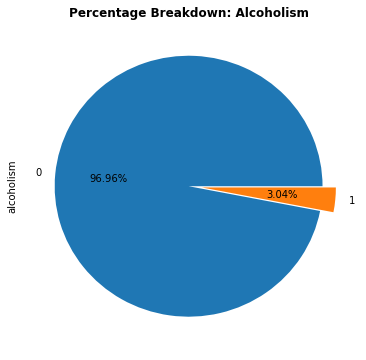

In [124]:
# percentage breakdown: alcoholism
df['alcoholism'].value_counts().plot(kind='pie',figsize=(6,6),explode=[0,0.1], autopct='%1.2f%%');
plt.title('percentage breakdown: alcoholism'.title(), weight = 'bold')

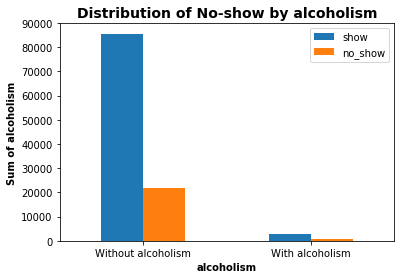

In [125]:
# Explore py chart
sumcompareplot(df, 'alcoholism',xy=[0,1],labs= ['Without','With'])

> **This chart indicates no alcoholism has a lot of appointment than alcoholism**

### Research Question 6 : No show rate by handcap

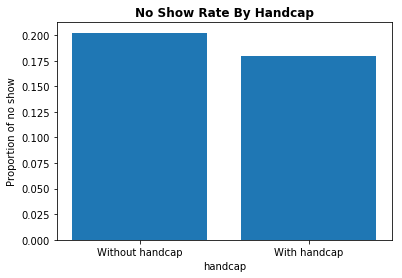

In [126]:
# no show by handcap
prodPlot(df,'handcap', xy=[0,1],  labs=['Without','With'] )

> **This chart indicates no handcap has no show rate more than handcap**

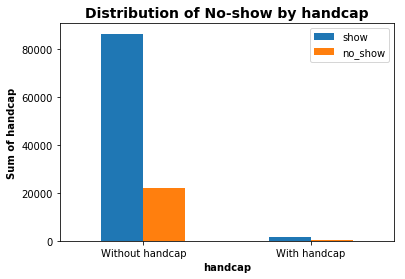

In [127]:
# Explore py chart
sumcompareplot(df, 'handcap',xy=[0,1],labs= ['Without','With'])

> **This chart indicates no handcap has a lot of appointment than handcap**

### Research Question 7 : No show rate by sms_received

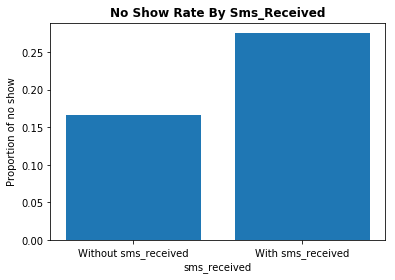

In [128]:
# no show by sms_received
prodPlot(df,'sms_received', xy=[0,1],  labs=['Without','With'] )

> **This chart indicates no sms_received has no show rate less than sms_received**

Text(0.5,1,'Percentage Breakdown: Sms_Received')

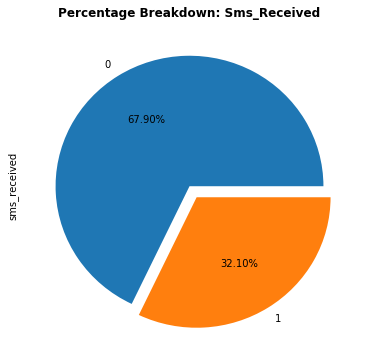

In [129]:
# percentage breakdown: sms_received
df['sms_received'].value_counts().plot(kind='pie',figsize=(6,6),explode=[0,0.1], autopct='%1.2f%%');
plt.title('percentage breakdown: sms_received'.title(), weight = 'bold')

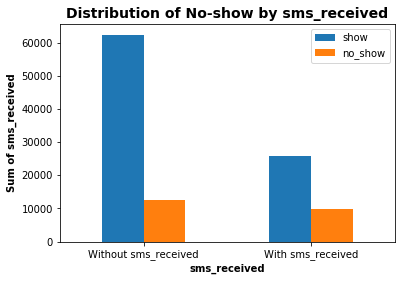

In [130]:
# Explore py chart
sumcompareplot(df, 'sms_received',xy=[0,1],labs= ['Without','With'])

> **This chart indicates no sms_received has a lot of appointment than sms_received**

<a id='conclusions'></a>
## Conclusions

> **Finally, summarize my findings and the results that have been performed:**
>
> No hipertension, no diabetes have no show rate more than hipertension, diabetes
>
> no sms_received, no scholarship have no show rate little bit than sms_received, scholarship
>
> Female, no alcoholism have no show equal male, alcoholism
>
> However, this data is in 2016, only one year so we don't have overview for conclusion
>
> **Limitation  :** It is difficult to ask the data analysis questions from data. If we find right data analysis question it help 